In [1]:
%run "C:/Users/ssiva/Documents_Karthik/Machine_Learning/Machine_Learning_Algorithms/Machine_Learning_Algorithms.ipynb"

Available functions:


create_random_df(model,nrows,ncols,nclasses,target_multiplier = 1),

find_cols_to_ignore(df,thresh_cat = 0.02,cols_to_ignore = None),

impute_cols(df,k=None,null_cols = 'auto_select',thresh_null_cat = 0.02,cols_to_ignore = None),

num_unique_values_in_cols(df,cols = None),

remove_outliers(df_in,outlier_cols = None,thresh_cat = 0.02,remove = True),

convert_cat(df, cat_cols=None,output_col=None,reset_index = False),

normalize(df,cols_to_ignore = None,target_col = None),

split_df(df,test_size = 0.3,df_to_return = 'df_train'),

shuffled_split_dfs(df,test_size = 0.3),

check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None),

stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.1,epoch = 10,algo = 'lin',initial_coeffs = 1, bias_coeff = None),

make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin',log_reg_thresh = 0.5),

optimize_log_reg(test_data,coeffs,output_col,num_steps=40,algo = 'l

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',20)

In [4]:
plt.rcParams['figure.figsize'] = (14,10)

In [5]:
sns.set_style('darkgrid')

In [6]:
page = requests.get("https://www.worldometers.info/coronavirus/country/us/")

In [7]:
soup = BeautifulSoup(page.content,'html.parser')

#### print(soup.prettify())

In [8]:
table = soup.find(id = "usa_table_countries_today")

#### print(table.prettify())

# Extracting Header Columns

In [9]:
header = table.find("thead").find("tr")

In [10]:
header_elements = table.find_all("th")

In [11]:
header_elements

[<th width="1%">#</th>,
 <th width="100">USA<br>State</br></th>,
 <th width="20">Total<br>Cases</br></th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th width="30">Source</th>,
 <th width="30">Projections</th>]

In [12]:
col_names = [elem.get_text() for elem in header_elements]

In [13]:
col_names.pop(0)

'#'

In [14]:
col_names

['USAState',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Source',
 'Projections']

In [15]:
col_names[7] = 'Tot Cases Per 1M Pop'
col_names[8] = 'Deaths Per 1M Pop'
col_names[10] = 'Tests Per 1M Pop'

# Extracting Table Values

In [16]:
table_data = table.find("tbody")

#### print(table_data.prettify())

In [17]:
table_rows = table_data.find_all("tr")

#### Collecting all data in the rows of the table while excluding the first column (index = 0) since it is just an index

In [18]:
matrix_data = []

In [19]:
for row in table_rows:
    row_list = row.find_all("td")
    row_elements = [row_list[i].get_text() for i in range(len(row_list)) if i != 0]
    matrix_data.append(row_elements)

In [20]:
matrix_data[0]

['USA Total',
 '88,244,870',
 '',
 '1,038,900',
 '',
 '84,040,477',
 '3,165,493',
 '266,599',
 '3,139',
 '1,043,663,721',
 '3,153,037',
 '',
 '\xa0',
 '\xa0']

# Reading the data into a Pandas DataFrame

In [21]:
worldometers = pd.DataFrame(matrix_data,columns = col_names)

In [22]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population,Source,Projections
0,USA Total,"88,244,870",,"1,038,900",,"84,040,477","3,165,493","266,599","3,139","1,043,663,721","3,153,037",,,
1,\nCalifornia,"9,958,460",\n,"\n92,254",,"\n9,211,670","\n654,536","252,035","2,335","\n171,841,582","4,349,074","\n39,512,223",\n[view by county] [1],\n[projections]\n
2,\nTexas,"7,078,920",\n,"\n89,006",,"\n6,801,913","\n188,001","244,135","3,070","\n66,528,565","2,294,414","\n28,995,881",\n[view by county] [1] [2] [3],\n[projections]\n
3,\nFlorida,"6,426,760",\n,"\n75,297",,"\n6,043,126","\n308,337","299,229","3,506","\n59,492,029","2,769,939","\n21,477,737",\n[view by county] [1] [2] [3] [4],\n[projections]\n
4,\nNew York,"5,728,293",\n,"\n69,961",,"\n5,601,610","\n56,722","294,460","3,596","\n112,986,246","5,807,998","\n19,453,561",\n[view by county] [1] [2] [3],\n[projections]\n


In [23]:
worldometers.drop(['Source','Projections'],axis = 1,inplace = True)

In [24]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
0,USA Total,"88,244,870",,"1,038,900",,"84,040,477","3,165,493","266,599","3,139","1,043,663,721","3,153,037",
1,\nCalifornia,"9,958,460",\n,"\n92,254",,"\n9,211,670","\n654,536","252,035","2,335","\n171,841,582","4,349,074","\n39,512,223"
2,\nTexas,"7,078,920",\n,"\n89,006",,"\n6,801,913","\n188,001","244,135","3,070","\n66,528,565","2,294,414","\n28,995,881"
3,\nFlorida,"6,426,760",\n,"\n75,297",,"\n6,043,126","\n308,337","299,229","3,506","\n59,492,029","2,769,939","\n21,477,737"
4,\nNew York,"5,728,293",\n,"\n69,961",,"\n5,601,610","\n56,722","294,460","3,596","\n112,986,246","5,807,998","\n19,453,561"


In [25]:
worldometers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
USAState                52 non-null object
TotalCases              52 non-null object
NewCases                52 non-null object
TotalDeaths             52 non-null object
NewDeaths               52 non-null object
TotalRecovered          52 non-null object
ActiveCases             52 non-null object
Tot Cases Per 1M Pop    52 non-null object
Deaths Per 1M Pop       52 non-null object
TotalTests              52 non-null object
Tests Per 1M Pop        52 non-null object
Population              52 non-null object
dtypes: object(12)
memory usage: 5.0+ KB


In [26]:
worldometers.columns

Index(['USAState', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Tot Cases Per 1M Pop',
       'Deaths Per 1M Pop', 'TotalTests', 'Tests Per 1M Pop', 'Population'],
      dtype='object')

### I noticed that due to how the data was entered, \n is showing up in some columns.  I will be treating for that now.

In [27]:
fix_columns = list(worldometers.columns)

In [28]:
for col in fix_columns:
    worldometers[col] = worldometers[col].apply(lambda val: val.split('\n')[-1])

In [29]:
worldometers

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
0,USA Total,"88,244,870",,"1,038,900",,"84,040,477","3,165,493","266,599","3,139","1,043,663,721","3,153,037",
1,California,"9,958,460",,"92,254",,"9,211,670","654,536","252,035","2,335","171,841,582","4,349,074","39,512,223"
2,Texas,"7,078,920",,"89,006",,"6,801,913","188,001","244,135","3,070","66,528,565","2,294,414","28,995,881"
3,Florida,"6,426,760",,"75,297",,"6,043,126","308,337","299,229","3,506","59,492,029","2,769,939","21,477,737"
4,New York,"5,728,293",,"69,961",,"5,601,610","56,722","294,460","3,596","112,986,246","5,807,998","19,453,561"
5,Illinois,"3,393,519",,"38,422",,"3,199,126","155,971","267,800","3,032","57,898,053","4,569,040","12,671,821"
6,Pennsylvania,"2,972,356",,"45,552",,"2,882,674","44,130","232,179","3,558","26,887,730","2,100,278","12,801,989"
7,North Carolina,"2,823,979",,"25,140",,"2,753,604","45,235","269,256","2,397","26,356,209","2,512,967","10,488,084"
8,Ohio,"2,815,069",,"38,657",,"2,724,031","52,381","240,829","3,307","22,272,602","1,905,416","11,689,100"
9,Georgia,"2,608,172",,"38,360",,"2,511,189","58,623","245,650","3,613","25,501,788","2,401,881","10,617,423"


### Now that the data looks good, I am going to convert the string columns which should be numeric to integer columns

In [30]:
# for col in worldometers.columns.drop("USAState"):
#     worldometers[col] = worldometers[col].apply(lambda val: int(val))

### From the error above shows that some values were entered with commas to show thousands and millions place.  I will treat for that now

In [31]:
for col in worldometers.columns.drop('USAState'):
    worldometers[col] = worldometers[col].apply(lambda val: ''.join(val.split(',')))

In [32]:
worldometers.head(1)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
0,USA Total,88244870,,1038900,,84040477,3165493,266599,3139,1043663721,3153037,


### Now that the commas are remove, I can convert the string columns to integer columns

### I added the if else cause in the lambda function because the NewCases and NewDeaths columns were filled with '' and ' ' since it was a new day and no new cases or deaths were recorded

In [33]:
for col in worldometers.columns.drop("USAState"):
    worldometers[col] = worldometers[col].apply(lambda val: int(val) if val not in  ['',' ','N/A ',' N/A '] else 0)

In [34]:
worldometers.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
0,USA Total,88244870,0,1038900,0,84040477,3165493,266599,3139,1043663721,3153037,0
1,California,9958460,0,92254,0,9211670,654536,252035,2335,171841582,4349074,39512223
2,Texas,7078920,0,89006,0,6801913,188001,244135,3070,66528565,2294414,28995881
3,Florida,6426760,0,75297,0,6043126,308337,299229,3506,59492029,2769939,21477737
4,New York,5728293,0,69961,0,5601610,56722,294460,3596,112986246,5807998,19453561


In [35]:
worldometers.iloc[1:,:].sum()

USAState                California Texas Florida New York Illinois Pen...
TotalCases                                                       85957772
NewCases                                                                0
TotalDeaths                                                       1008864
NewDeaths                                                               0
TotalRecovered                                                   81937209
ActiveCases                                                       3011699
Tot Cases Per 1M Pop                                             13532760
Deaths Per 1M Pop                                                  151549
TotalTests                                                     1028947133
Tests Per 1M Pop                                                155238145
Population                                                      328239523
dtype: object

### I noticed that the first state which looks at the US overall does not exactly match the sum of the 50 + 1 (DC) states.  this is because USATotal includes territories and other areas.  I am going to account for this.

In [36]:
to_sum_cols = worldometers.columns.drop(['USAState','Tot Cases Per 1M Pop','Deaths Per 1M Pop','Tests Per 1M Pop'])

In [37]:
to_sum_cols

Index(['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'ActiveCases', 'TotalTests', 'Population'],
      dtype='object')

In [38]:
for col in to_sum_cols:
    worldometers.loc[0,col] = worldometers.loc[1:,col].sum()

In [39]:
worldometers

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
0,USA Total,85957772,0,1008864,0,81937209,3011699,266599,3139,1028947133,3153037,328239523
1,California,9958460,0,92254,0,9211670,654536,252035,2335,171841582,4349074,39512223
2,Texas,7078920,0,89006,0,6801913,188001,244135,3070,66528565,2294414,28995881
3,Florida,6426760,0,75297,0,6043126,308337,299229,3506,59492029,2769939,21477737
4,New York,5728293,0,69961,0,5601610,56722,294460,3596,112986246,5807998,19453561
5,Illinois,3393519,0,38422,0,3199126,155971,267800,3032,57898053,4569040,12671821
6,Pennsylvania,2972356,0,45552,0,2882674,44130,232179,3558,26887730,2100278,12801989
7,North Carolina,2823979,0,25140,0,2753604,45235,269256,2397,26356209,2512967,10488084
8,Ohio,2815069,0,38657,0,2724031,52381,240829,3307,22272602,1905416,11689100
9,Georgia,2608172,0,38360,0,2511189,58623,245650,3613,25501788,2401881,10617423


In [40]:
corona = worldometers.loc[1:,:]

# EDA

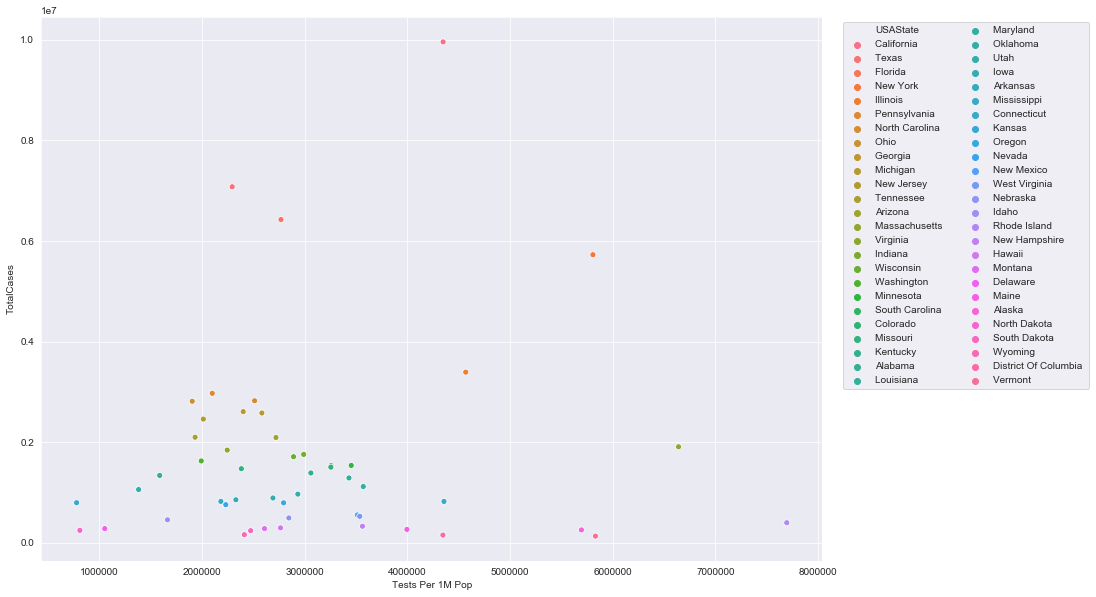

In [41]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop',y = "TotalCases",hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

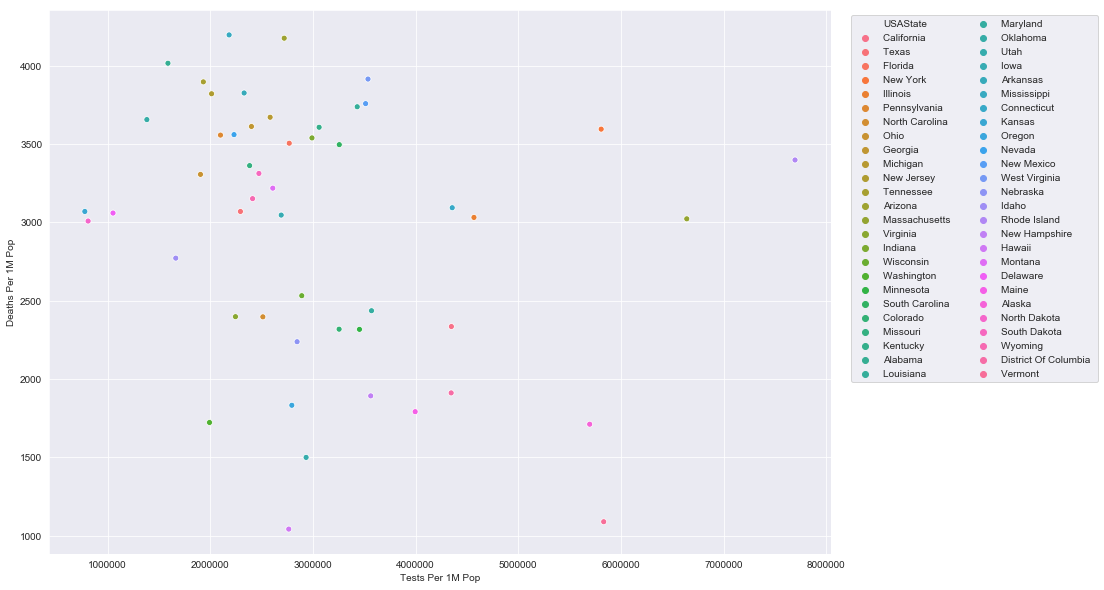

In [42]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop', y = 'Deaths Per 1M Pop',hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

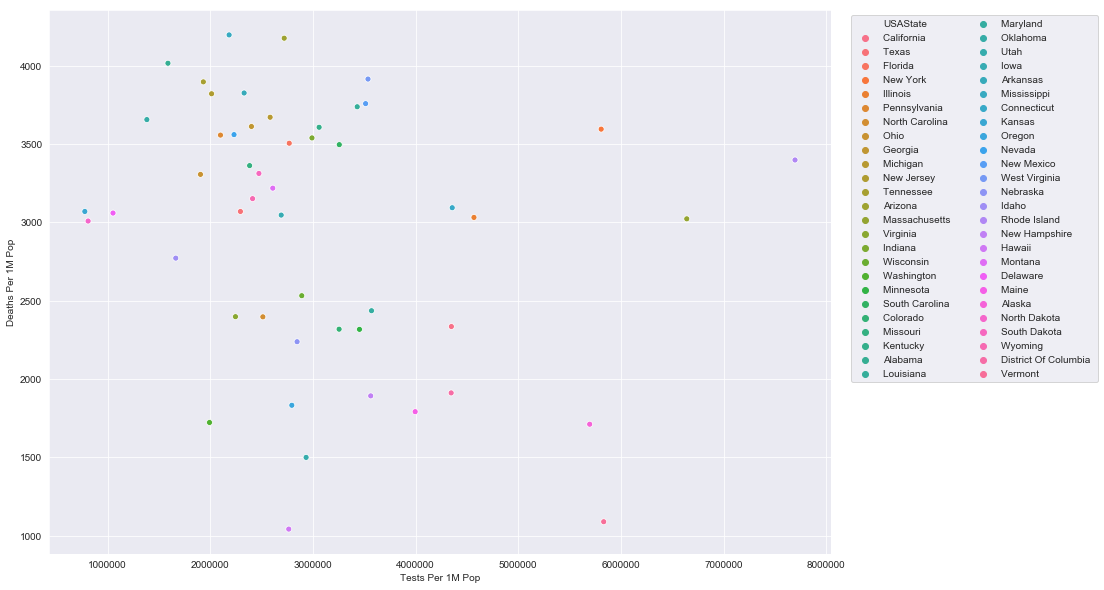

In [43]:
sns.scatterplot(data = corona,x = 'Tests Per 1M Pop', y= "Deaths Per 1M Pop",hue = 'USAState')
plt.legend(bbox_to_anchor = (1.02,1),ncol = 2)

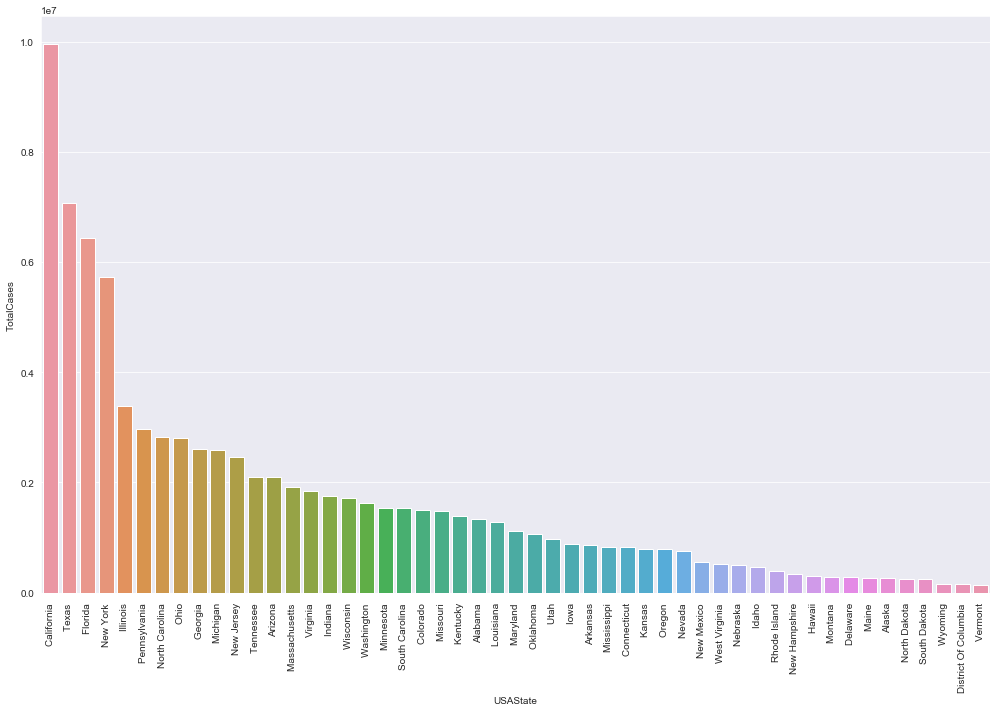

In [44]:
sns.barplot(data = corona,x = 'USAState',y = 'TotalCases')
plt.xticks(rotation = 90)
plt.tight_layout()

# Further EDA

### Now I am going to read in a file with state demographics

In [45]:
state_demo = pd.read_csv(r'C:\Users\ssiva\Documents_Karthik\Machine_Learning\US_States_Data\us_county_sociohealth_data.csv')

In [46]:
state_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Columns: 181 entries, fips to percentile_rank_social_vulnerability
dtypes: float64(147), int64(30), object(4)
memory usage: 4.3+ MB


In [47]:
state_demo.describe()

,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
count,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,2851.000000,2851.000000,3144.000000,3144.000000,3144.000000,3037.000000,3144.000000,3144.000000,3125.000000,3144.000000,3138.000000,3144.000000,3109.000000,3109.000000,3109.000000,2992.000000,2992.000000,2989.000000,3143.000000,3143.000000,...,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,38.457313,-92.280536,1.043681e+05,1124.200881,276.839299,1363.905998,8581.299586,17.935375,3.990334,4.167264,8.140924,17.468421,32.853657,7.451629,27.365692,62.834015,17.513798,16.196526,58.485365,28.325433,593.586230,401.280387,29.877944,8948.394846,11.476161,...,4.629448,12.983354,2.419351,6.554915,3.546195,0.497665,0.495163,0.499878,0.497565,0.499962,0.496368,0.500056,0.496486,0.500114,0.499871,0.500198,0.499105,0.500181,0.499996,0.497943,0.500021,0.494548,0.499785,0.500085,0.500037
std,5.307184,12.921097,3.581135e+05,3611.454730,1864.419086,3605.025873,2604.859173,4.739056,0.704652,0.602526,2.039656,3.609522,5.453932,1.145124,5.695856,23.372086,3.148348,37.451440,135.583655,15.018175,2549.520469,283.043120,14.206579,35943.904526,5.143456,...,5.639319,9.535382,2.416937,4.588769,4.655000,0.289098,0.289206,0.288792,0.289402,0.288751,0.289084,0.288757,0.289211,0.288763,0.288772,0.288847,0.290705,0.288864,0.289413,0.289575,0.288998,0.289877,0.288986,0.288816,0.288755
min,19.598724,-166.890423,7.600000e+01,2.050706,0.038490,32.000000,2730.603992,8.120645,2.449054,2.532818,2.891156,5.908719,12.400000,0.000000,9.500000,0.000000,7.809632,0.000000,1.000000,0.000000,4.000000,35.800000,2.109069,27.000000,2.262724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.703544,-98.223328,1.099750e+04,430.728099,16.802899,226.000000,6792.558649,14.321162,3.471602,3.748762,6.770833,14.939163,29.200000,6.900000,23.500000,48.519960,15.295852,3.000000,13.000000,19.607843,35.000000,227.200000,19.188612,889.000000,7.395900,...,1.400000,5.400000,1.200000,4.400000,1.200000,0.245500,0.246875,0.249825,0.247700,0.250125,0.246700,0.250125,0.249600,0.250125,0.249825,0.250125,0.250125,0.250125,0.250125,0.245500,0.250125,0.249600,0.250125,0.250

In [48]:
state_demo.head()

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,01001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,15.0,56.0,26.785714,226.0,407.2,...,4.6,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.7380,0.3200,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773
1,01003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,48.0,156.0,30.769231,691.0,325.0,...,18.3,11.9,1.3,3.1,1.5,0.3317,0.4241,0.2448,0.2999,0.2881,0.6437,0.4476,0.3521,0.1493,0.2057,0.5253,0.5282,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757
2,01005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,12.0,30.0,40.000000,181.0,716.3,...,1.5,29.9,1.7,9.7,11.0,0.9261,0.9526,0.9491,0.9551,0.9768,0.4174,0.3617,0.8937,0.9296,0.8835,0.9042,0.6979,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847
3,01007,Alabama,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,37.6,7.8,33.5,16.251364,15.570042,8.0,29.0,27.586207,77.0,339.7,...,2.2,28.4,0.3,6.3,8.9,0.5536,0.5425,0.8819,0.7781,0.7393,0.2585,0.3088,0.4419,0.3266,0.1022,0.6450,0.3553,0.5018,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737
4,01009,Alabama,Blount,33.980878,-86.567383,57704,644.806508,89.490412,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,33.8,8.4,30.3,15.634486,14.230594,14.0,72.0,19.444444,136.0,234.4,...,0.8,22.9,1.9,4.0,1.0,0.5536,0.3792,0.7504,0.8058,0.6609,0.4909,0.6466,0.4527,0.4018,0.4664,0.4238,0.7482,0.5992,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986


In [49]:
democols = list(state_demo.columns)

In [50]:
democols

['fips',
 'state',
 'county',
 'lat',
 'lon',
 'total_population',
 'area_sqmi',
 'population_density_per_sqmi',
 'num_deaths',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'num_alcohol_impaired_driving_deaths',
 'num_driving_deaths',
 'percent_driving_deaths_with_alcohol_involvement',
 'num_chlamydia_cases',
 'chlamydia_rate',
 'teen_birth_rate',
 'num_uninsured',
 'percent_uninsured',
 'num_primary_care_physicians',
 'primary_care_physicians_rate',
 'num_dentists',
 'dentist_rate',
 'num_mental_health_providers',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school

In [51]:
stateslist = list(state_demo['state'].value_counts().index)

In [52]:
len(stateslist)

51

# Treating State Demographics Table

In [53]:
state_demo.head(3)

,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,01001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,15.0,56.0,26.785714,226.0,407.2,...,4.6,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.7380,0.3200,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773
1,01003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,48.0,156.0,30.769231,691.0,325.0,...,18.3,11.9,1.3,3.1,1.5,0.3317,0.4241,0.2448,0.2999,0.2881,0.6437,0.4476,0.3521,0.1493,0.2057,0.5253,0.5282,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757
2,01005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,12.0,30.0,40.000000,181.0,716.3,...,1.5,29.9,1.7,9.7,11.0,0.9261,0.9526,0.9491,0.9551,0.9768,0.4174,0.3617,0.8937,0.9296,0.8835,0.9042,0.6979,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847


In [54]:
state_demo[['total_population','population']].head()

,total_population,population
0,55049,14438
1,199510,48703
2,26614,6779
3,22572,5970
4,57704,13939


### First I need to aggregate the county data to state level.  The obstacle is that some columns need to be aggregated by summing and others by taking the mean.  First, for each county, I will find the percentage of the population the county has relative to the state the county belongs to.  Then, I will separate columns based on which of these two groups they belong to: sum counties or weighted mean counties.

In [55]:
state_demo.groupby('state').sum()['total_population']['Alabama']

4841164

In [56]:
def find_county_pop_ratio(cols):
    state,tot_pop = cols
    df = state_demo
    grouped = df.groupby('state').sum()['total_population']
    ratio = tot_pop/grouped[state]
    return ratio


In [57]:
state_demo['county_state_pop_ratio'] = state_demo[['state','total_population']].apply(find_county_pop_ratio,axis = 1)

### Now I am checking whether the population ratios were properly applied so that I can then use them as weights when I aggregate after grouping by the state

In [58]:
state_demo[state_demo['state'] == 'Alabama'].sum()['county_state_pop_ratio']

0.9999999999999998

In [59]:
state_demo[state_demo['state'] == 'Alabama'][['county','county_state_pop_ratio']].loc[0]

county                     Autauga
county_state_pop_ratio    0.011371
Name: 0, dtype: object

In [60]:
state_demo[state_demo['county'] == 'Autauga']['total_population'][0] / state_demo[state_demo['state'] == 'Alabama'].sum()['total_population']

0.011371025645898383

#### Everything seems to have worked fine

### Now I will separate the columns based on whether they need to be summed or averaged

In [61]:
state_demo.drop('fips',axis = 1, inplace = True)

In [62]:
# I will drop the population_density_per_sqmi since it can be calculated after grouping by state
state_demo.drop("population_density_per_sqmi",axis = 1,inplace = True)

In [63]:
democols = list(state_demo.columns)

In [64]:
democols

['state',
 'county',
 'lat',
 'lon',
 'total_population',
 'area_sqmi',
 'num_deaths',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'num_alcohol_impaired_driving_deaths',
 'num_driving_deaths',
 'percent_driving_deaths_with_alcohol_involvement',
 'num_chlamydia_cases',
 'chlamydia_rate',
 'teen_birth_rate',
 'num_uninsured',
 'percent_uninsured',
 'num_primary_care_physicians',
 'primary_care_physicians_rate',
 'num_dentists',
 'dentist_rate',
 'num_mental_health_providers',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school_graduation_rate',
 'num_some_college',
 

In [65]:
state_demo.head(1)

,state,county,lat,lon,total_population,area_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,...,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,county_state_pop_ratio
0,Alabama,Autauga,32.534928,-86.642748,55049,594.44612,791.0,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,15.0,56.0,26.785714,226.0,407.2,25.284927,4093.0,...,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.738,0.32,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773,0.011371


In [66]:
neither_cols = ['state','county','county_state_pop_ratio']

In [67]:
sum_cols = ['total_population','area_sqmi','num_deaths','num_alcohol_impaired_driving_deaths','num_driving_deaths','num_chlamydia_cases',
            'num_uninsured','num_primary_care_physicians','num_dentists','num_mental_health_providers','num_some_college',
           'population','num_unemployed_CHR','labor_force','num_single_parent_households_CHR','num_households_CHR',
            'num_associations','num_injury_deaths','num_workers_who_drive_alone','num_deaths_2','num_deaths_3','num_deaths_4',
            'num_hiv_cases','num_food_insecure','num_limited_access','num_drug_overdose_deaths','num_motor_vehicle_deaths',
            'num_uninsured_2','num_uninsured_3','num_deaths_5','num_homeowners','num_households_with_severe_cost_burden',
            'population_2','num_black','num_american_indian_alaska_native','num_asian','num_native_hawaiian_other_pacific_islander',
           'num_hispanic','num_non_hispanic_white','num_not_proficient_in_english','num_rural','num_housing_units',
            'num_households_CDC','num_below_poverty','num_unemployed_CDC','num_no_highschool_diploma','num_age_65_and_older',
           'num_age_17_and_younger','num_disabled','num_single_parent_households_CDC','num_minorities','num_limited_english_abilities',
           'num_multi_unit_housing','num_mobile_homes','num_overcrowding','num_households_with_no_vehicle','num_institutionalized_in_group_quarters']

In [68]:
[i for i in sum_cols if i not in democols]

[]

In [69]:
mean_cols = [col for col in democols if col not in neither_cols and col not in sum_cols]

In [70]:
mean_cols

['lat',
 'lon',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'percent_driving_deaths_with_alcohol_involvement',
 'chlamydia_rate',
 'teen_birth_rate',
 'percent_uninsured',
 'primary_care_physicians_rate',
 'dentist_rate',
 'mental_health_provider_rate',
 'preventable_hospitalization_rate',
 'percent_with_annual_mammogram',
 'percent_vaccinated',
 'high_school_graduation_rate',
 'percent_some_college',
 'percent_unemployed_CHR',
 'percent_children_in_poverty',
 'eightieth_percentile_income',
 'twentieth_percentile_income',
 'income_ratio',
 'percent_single_parent_households_CHR',
 'social_association_rate',
 'annual_average_violent_crimes',
 'violent_c

### Now I will create 2 separate dataframes that contain the 2 separate column types (summation vs averaging)

In [71]:
mean_df = state_demo[neither_cols + mean_cols]

In [72]:
sum_df = state_demo[neither_cols + sum_cols]

In [73]:
mean_df.head(1)

,state,county,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,Alabama,Autauga,0.011371,32.534928,-86.642748,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,8.721686,45.0418,32.37352,23.38087,7108.0,41.0,...,4.6,18.0,1.2,4.9,0.9,0.2824,0.3298,0.3607,0.4744,0.3298,0.1964,0.8313,0.738,0.32,0.5568,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773


In [74]:
sum_df.head(1)

,state,county,county_state_pop_ratio,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,...,population_2,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_not_proficient_in_english,num_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters
0,Alabama,Autauga,0.011371,55049,594.44612,791.0,15.0,56.0,226.0,4093.0,25.0,18.0,13.0,8953,14438,942.0,25957.0,3495.0,13318.0,67,190.0,24428.0,791.0,30.0,35.0,...,55601,10755,267,681,62,1649,41316,426,22921.0,22714,20800,6697,1437,4528,7695,13853,10009,1516,13386,432,1034,4095,254,1024,490


### Now I will groupby the state column for both but use sum for one df and mean for the other

#### Grouping by state for sum_df

In [75]:
sum_grouped_df = sum_df.groupby('state').sum()

In [76]:
sum_grouped_df.head(1)

,county_state_pop_ratio,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,...,population_2,num_black,num_american_indian_alaska_native,num_asian,num_native_hawaiian_other_pacific_islander,num_hispanic,num_non_hispanic_white,num_not_proficient_in_english,num_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,4841164,50646.423651,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,...,4887871,1295175,34375,73167,5207,217181,3197324,48517,1957932.0,2209335,1851061,868666,184479,496036,742394,1105189,777592,178209,1636829,51759,155936,295722,31333,119374,118341


#### Grouping by state for mean_df is more complicated.  First, I will have to apply a function that multiplies every value by the 'county_state_pop_ratio'. Then, I need to sum the grouped by state df like I did for the sum_df

In [77]:
def scale_by_pop_ratio(cols):
    ratio,feature = cols
    return ratio * feature

In [78]:
for col in mean_cols:
    mean_df[col] = mean_df[['county_state_pop_ratio',col]].apply(scale_by_pop_ratio,axis = 1)

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
mean_df.head(1)

,state,county,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,Alabama,Autauga,0.011371,0.369956,-0.985217,92.430419,0.237461,0.053943,0.052921,0.098013,0.205606,0.378655,0.081871,0.394575,0.78608,0.170861,0.304581,4.630282,0.287516,0.099175,0.512171,0.36812,0.265864,80.82525,0.466212,...,0.052307,0.204678,0.013645,0.055718,0.010234,0.003211,0.00375,0.004102,0.005394,0.00375,0.002233,0.009453,0.008392,0.003639,0.006331,0.007208,0.006089,0.006795,0.007722,0.008264,0.002817,0.00375,0.001423,0.003276,0.00429


In [80]:
mean_grouped_df = mean_df.groupby('state').sum()

In [81]:
mean_grouped_df.head(1)

,county_state_pop_ratio,lat,lon,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,percent_driving_deaths_with_alcohol_involvement,chlamydia_rate,teen_birth_rate,percent_uninsured,primary_care_physicians_rate,dentist_rate,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,33.027625,-86.760012,10014.619701,21.515834,4.665244,4.819688,10.208255,18.845175,35.495411,7.041843,29.795249,61.37066,14.620799,26.922322,616.546275,31.56191,11.074776,64.700862,48.138946,100.95216,5729.660789,39.959841,41.356968,89.22466,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.54224,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531


In [82]:
sum_grouped_df.drop('county_state_pop_ratio',axis = 1,inplace = True)
mean_grouped_df.drop('county_state_pop_ratio',axis = 1,inplace = True)

### Now I will join both the dfs that are properly grouped by state

In [83]:
states = sum_grouped_df.merge(mean_grouped_df,on = 'state')

In [84]:
states.head()

,total_population,area_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,num_limited_access,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4841164,50646.423651,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,3.786232e+05,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.542240,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531
Alaska,736855,570638.009498,8087.0,139.0,374.0,5627.0,94727.0,673.0,737.0,3189.0,137348,211198,23510.0,356886.0,54574.0,184114.0,759,3412.0,358627.0,8287.0,466.0,353.0,0.0,97240,6.499454e+04,...,7.687689,4.518644,7.216046,10.516290,3.791470,0.161365,0.567122,0.126144,0.151597,0.205627,0.041051,0.773390,0.156787,0.679014,0.261366,0.751698,0.647775,0.732786,0.741940,0.197084,0.913354,0.505944,0.652233,0.740492,0.419030
Arizona,6728577,113590.652461,80394.0,1177.0,4626.0,39598.0,685974.0,4663.0,4411.0,9552.0,1143921,1801031,166205.0,3439758.0,574655.0,1617093.0,3930,28744.0,3008707.0,80394.0,3197.0,3314.0,15524.0,968060,4.821987e+05,...,11.853311,10.068892,4.527625,6.724287,2.300098,0.610184,0.622089,0.340194,0.537315,0.536979,0.340470,0.689778,0.258180,0.702382,0.471388,0.833555,0.901623,0.909963,0.845531,0.406760,0.892418,0.606720,0.421305,0.797690,0.731587
Arkansas,2968472,52035.552487,48017.0,690.0,2622.0,17320.0,226179.0,2000.0,1398.0,6820.0,442445,758003,50038.0,1351498.0,251428.0,696561.0,3370,12245.0,1274750.0,48017.0,1782.0,1551.0,5412.0,500160,2.549699e+05,...,6.477839,12.256901,2.630970,6.363001,2.798870,0.651842,0.491900,0.567490,0.567005,0.588250,0.346172,0.650907,0.579157,0.627393,0.611513,0.605824,0.568803,0.605553,0.634455,0.510007,0.642596,0.521731,0.460876,0.617100,0.642274
California,38654206,155792.582241,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,815409.0,19398212.0,2801098.0,8999228.0,23099,98492.0,17904213.0,347916.0,13296.0,14745.0,123826.0,4317940,1.225949e+06,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029


In [85]:
states['pop_density_per_sqmi'] = states[['total_population','area_sqmi']].apply(lambda cols: cols[0] / cols[1],axis = 1)

In [86]:
states = states[list(states.columns)[:2] + list(states.columns)[-1:] + list(states.columns)[2:-1]]

In [87]:
states.head()

,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,num_unemployed_CHR,labor_force,num_single_parent_households_CHR,num_households_CHR,num_associations,num_injury_deaths,num_workers_who_drive_alone,num_deaths_2,num_deaths_3,num_deaths_4,num_hiv_cases,num_food_insecure,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4841164,50646.423651,95.587480,81791.0,1284.0,4654.0,29935.0,438049.0,3160.0,2355.0,4945.0,744300,1232042,86493.0,2198844.0,406913.0,1089671.0,5827,20015.0,2051445.0,81791.0,2986.0,3087.0,12496.0,765910,...,7.023993,13.229587,1.698812,6.432407,2.439064,0.631678,0.644395,0.498179,0.574569,0.609025,0.328899,0.542240,0.544685,0.643664,0.542716,0.706478,0.555904,0.656525,0.652319,0.521735,0.403223,0.529277,0.498383,0.540705,0.625531
Alaska,736855,570638.009498,1.291283,8087.0,139.0,374.0,5627.0,94727.0,673.0,737.0,3189.0,137348,211198,23510.0,356886.0,54574.0,184114.0,759,3412.0,358627.0,8287.0,466.0,353.0,0.0,97240,...,7.687689,4.518644,7.216046,10.516290,3.791470,0.161365,0.567122,0.126144,0.151597,0.205627,0.041051,0.773390,0.156787,0.679014,0.261366,0.751698,0.647775,0.732786,0.741940,0.197084,0.913354,0.505944,0.652233,0.740492,0.419030
Arizona,6728577,113590.652461,59.235305,80394.0,1177.0,4626.0,39598.0,685974.0,4663.0,4411.0,9552.0,1143921,1801031,166205.0,3439758.0,574655.0,1617093.0,3930,28744.0,3008707.0,80394.0,3197.0,3314.0,15524.0,968060,...,11.853311,10.068892,4.527625,6.724287,2.300098,0.610184,0.622089,0.340194,0.537315,0.536979,0.340470,0.689778,0.258180,0.702382,0.471388,0.833555,0.901623,0.909963,0.845531,0.406760,0.892418,0.606720,0.421305,0.797690,0.731587
Arkansas,2968472,52035.552487,57.046997,48017.0,690.0,2622.0,17320.0,226179.0,2000.0,1398.0,6820.0,442445,758003,50038.0,1351498.0,251428.0,696561.0,3370,12245.0,1274750.0,48017.0,1782.0,1551.0,5412.0,500160,...,6.477839,12.256901,2.630970,6.363001,2.798870,0.651842,0.491900,0.567490,0.567005,0.588250,0.346172,0.650907,0.579157,0.627393,0.611513,0.605824,0.568803,0.605553,0.634455,0.510007,0.642596,0.521731,0.460876,0.617100,0.642274
California,38654206,155792.582241,248.113263,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,815409.0,19398212.0,2801098.0,8999228.0,23099,98492.0,17904213.0,347916.0,13296.0,14745.0,123826.0,4317940,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029


In [88]:
### Now I will write the states to a csv file for future reference
#states.to_csv(r"C:\Users\ssiva\OneDrive\Documents\Machine Learning_\Machine Learning\US_States_Data\state_demographics.csv")

In [89]:
corona.head(2)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
1,California,9958460,0,92254,0,9211670,654536,252035,2335,171841582,4349074,39512223
2,Texas,7078920,0,89006,0,6801913,188001,244135,3070,66528565,2294414,28995881


# Joining Corona df (corona) and State Demographics df (states)

### I need to check if the state names of both datasets match

In [90]:
corstates = list(corona['USAState'])

In [91]:
demostates = list(states.index)

### Now I will find all the states in corstates that not in demostates

In [92]:
fix_states = [state for state in corstates if state not in demostates]

In [93]:
fix_states

['California ',
 'Texas ',
 'Florida ',
 'New York ',
 'Illinois ',
 'Pennsylvania ',
 'North Carolina ',
 'Ohio ',
 'Georgia ',
 'Michigan ',
 'New Jersey ',
 'Tennessee ',
 'Arizona ',
 'Massachusetts ',
 'Virginia ',
 'Indiana ',
 'Wisconsin ',
 'Washington ',
 'Minnesota ',
 'South Carolina ',
 'Colorado ',
 'Missouri ',
 'Kentucky ',
 'Alabama ',
 'Louisiana ',
 'Maryland ',
 'Oklahoma ',
 'Utah ',
 'Iowa ',
 'Arkansas ',
 'Mississippi ',
 'Connecticut ',
 'Kansas ',
 'Oregon ',
 'Nevada ',
 'New Mexico ',
 'West Virginia ',
 'Nebraska ',
 'Idaho ',
 'Rhode Island ',
 'New Hampshire ',
 'Hawaii ',
 'Montana ',
 'Delaware ',
 'Maine ',
 'Alaska ',
 'North Dakota ',
 'South Dakota ',
 'Wyoming ',
 'District Of Columbia ',
 'Vermont ']

### THE SPACES ONLY APPEARED ON ONE DAY, NOT THE NEXT. It Seems the states in corstates have a space after the state.  I am fixing it now.

In [94]:
corona.head(1)

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population
1,California,9958460,0,92254,0,9211670,654536,252035,2335,171841582,4349074,39512223


In [95]:
corona.loc[1]['USAState']

'California '

In [96]:
corona['USAState'] = corona['USAState'].apply(lambda state: state[:-1])

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
corona.loc[1]['USAState']

'California'

### Now I am checking if the states match again

In [98]:
corstates = list(corona['USAState'])

In [99]:
fix_states = [state for state in corstates if state not in demostates]

In [100]:
fix_states

['District Of Columbia']

### I am fixing the space in 'Wisconsin' and 'Alaska' in corona dataframe

In [101]:
corona['USAState'] = corona['USAState'].apply(lambda state: state[:-1] if state[-1] == ' ' else state)

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
corona.count()[0]

51

In [103]:
states.count()[0]

51

In [104]:
demostates

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

### District Of Columbia ====> District of Columbia

In [105]:
corona[corona['USAState'] == 'District Of Columbia']['USAState']

50    District Of Columbia
Name: USAState, dtype: object

In [106]:
corona.loc[39,'USAState'] = 'District of Columbia'

C:\Users\ssiva\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [107]:
corona.loc[39,'USAState']

'District of Columbia'

### Checking again

In [108]:
corstates = list(corona['USAState'])

fix_states = [state for state in corstates if state not in demostates]

fix_states

['District Of Columbia']

### Now I can join the two tables

In [109]:
states.reset_index(inplace = True)

In [110]:
cordemo = corona.merge(states,left_on = 'USAState',right_on = 'state')

In [111]:
cordemo.drop('state',axis = 1,inplace = True)

In [112]:
cordemo.rename({'USAState':'State'},axis = 1,inplace = True)

In [113]:
cordemo

,State,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,California,9958460,0,92254,0,9211670,654536,252035,2335,171841582,4349074,39512223,38654206,155792.582241,248.113263,347837.0,5266.0,17773.0,218785.0,2740078.0,31343.0,33456.0,139697.0,7207217,11089177,...,17.009694,3.638684,8.331573,7.480061,2.095915,0.496290,0.703707,0.248241,0.695755,0.547043,0.149224,0.602122,0.120397,0.626015,0.234049,0.923915,0.961299,0.963333,0.911778,0.155487,0.957453,0.603848,0.468633,0.778842,0.673029
1,Texas,7078920,0,89006,0,6801913,188001,244135,3070,66528565,2294414,28995881,26956435,261249.531944,103.182711,295950.0,4917.0,18289.0,151476.0,4704625.0,17239.0,16544.0,32666.0,4828676,7861879,...,14.802563,7.067231,5.010390,5.649818,2.225439,0.526420,0.447032,0.337787,0.658899,0.495837,0.115355,0.838975,0.212115,0.751025,0.441901,0.881486,0.913851,0.926168,0.842606,0.286606,0.866800,0.458623,0.355611,0.643148,0.653284
2,Florida,6426760,0,75297,0,6043126,308337,299229,3506,59492029,2769939,21477737,19934451,53638.911164,371.641604,263456.0,3467.0,14857.0,100018.0,2615963.0,15216.0,12575.0,34241.0,3239393,5159707,...,19.769208,8.774942,3.013418,6.994264,2.171138,0.516175,0.693276,0.328164,0.463217,0.506714,0.524582,0.295508,0.320234,0.580122,0.312679,0.791238,0.843825,0.849231,0.899122,0.346526,0.664710,0.606649,0.415874,0.701713,0.627565
3,New York,5728293,0,69961,0,5601610,56722,294460,3596,112986246,5807998,19453561,28159418,47426.389044,593.749990,262854.0,1229.0,6290.0,188474.0,1675690.0,22967.0,23339.0,83888.0,5428675,7967607,...,34.456241,1.502772,6.408737,35.941876,2.670493,0.523273,0.608831,0.246016,0.572962,0.486084,0.232948,0.415226,0.151993,0.556608,0.196242,0.811242,0.883217,0.867345,0.915359,0.064048,0.783332,0.915071,0.527913,0.810405,0.597494
4,Illinois,3393519,0,38422,0,3199126,155971,267800,3032,57898053,4569040,12671821,12851684,55517.103751,231.490534,143269.0,1636.0,5121.0,75518.0,837890.0,10241.0,9927.0,29250.0,2373332,3431354,...,14.313896,2.386481,2.633894,10.749357,2.326366,0.406783,0.651256,0.168800,0.407115,0.399103,0.222875,0.581088,0.150395,0.572449,0.223301,0.720558,0.771043,0.768909,0.851513,0.099911,0.630349,0.671782,0.452689,0.598641,0.488775
5,Pennsylvania,2972356,0,45552,0,2882674,44130,232179,3558,26887730,2100278,12801989,12783977,44742.359325,285.724249,165456.0,1583.0,5910.0,56447.0,674739.0,10353.0,8836.0,26440.0,2054924,3162970,...,8.558349,3.843558,1.372826,11.207406,3.357502,0.341847,0.512842,0.263945,0.326884,0.338911,0.446130,0.347618,0.351348,0.470588,0.280199,0.523019,0.639894,0.591304,0.786546,0.166920,0.303046,0.753259,0.644188,0.567760,0.401345
6,North Carolina,2823979,0,25140,0,2753604,45235,269256,2397,26356209,2512967,10488084,9940828,48618.466232,204.466096,134245.0,2051.0,6962.0,62876.0,1063335.0,7275.0,5838.0,25355

In [114]:
cordemo_norm = normalize(cordemo,cols_to_ignore=['State','TotalCases','NewCases','TotalDeaths','NewDeaths','ActiveCases',
                                                 'Tot Cases Per 1M Pop','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'])

In [115]:
cordemo_norm

,State,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases Per 1M Pop,Deaths Per 1M Pop,TotalTests,Tests Per 1M Pop,Population,total_population,area_sqmi,pop_density_per_sqmi,num_deaths,num_alcohol_impaired_driving_deaths,num_driving_deaths,num_chlamydia_cases,num_uninsured,num_primary_care_physicians,num_dentists,num_mental_health_providers,num_some_college,population,...,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,California,9958460,0,92254,0,1.000000,654536,252035,2335,171841582,4349074,1.000000,1.000000,0.272937,0.022904,1.000000,1.000000,0.971577,1.000000,0.580206,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.305949,0.220103,0.910954,0.116717,0.160990,0.619577,0.893256,0.354640,1.000000,0.710025,0.206312,0.601984,0.068633,0.606045,0.294030,0.928256,1.000000,1.000000,0.814032,0.247203,0.966137,0.525331,0.385381,0.667791,0.842148
1,Texas,7078920,0,89006,0,0.734696,188001,244135,3070,66528565,2294414,0.729889,0.692739,0.457762,0.009455,0.847870,0.933231,1.000000,0.689716,1.000000,0.544297,0.488538,0.225944,0.665430,0.705157,...,0.252556,0.427496,0.479467,0.060817,0.188130,0.667067,0.528240,0.485735,0.934513,0.631291,0.141716,0.861732,0.213396,0.815292,0.597256,0.873311,0.935481,0.950082,0.666038,0.455665,0.835772,0.349637,0.204326,0.430481,0.810896
2,Florida,6426760,0,75297,0,0.651156,308337,299229,3506,59492029,2769939,0.536787,0.508296,0.093901,0.034366,0.752599,0.655826,0.810951,0.452502,0.553685,0.478934,0.368505,0.237335,0.441879,0.458289,...,0.372705,0.530795,0.220021,0.101880,0.176752,0.650920,0.878422,0.471648,0.586817,0.648015,0.922209,0.265731,0.384047,0.529226,0.408740,0.756441,0.840264,0.846747,0.786955,0.550928,0.545151,0.528720,0.300865,0.532903,0.770189
3,New York,5728293,0,69961,0,0.602547,56722,294460,3596,112986246,5807998,0.484796,0.724338,0.083013,0.054977,0.750834,0.227664,0.339044,0.860271,0.352763,0.729370,0.694036,0.596385,0.749827,0.714816,...,0.728001,0.090902,0.661140,0.986008,0.281386,0.662107,0.758334,0.351383,0.781817,0.616294,0.365992,0.397021,0.118502,0.489866,0.238876,0.782346,0.893827,0.871075,0.821693,0.101827,0.715738,0.901850,0.480345,0.722990,0.722593
4,Illinois,3393519,0,38422,0,0.338044,155971,267800,3032,57898053,4569040,0.310608,0.322256,0.097193,0.021361,0.400217,0.305529,0.274650,0.339561,0.173738,0.318191,0.288423,0.201240,0.320057,0.300388,...,0.240735,0.144358,0.170713,0.216569,0.209278,0.478501,0.818666,0.238339,0.487133,0.482551,0.346781,0.578916,0.115980,0.516383,0.278350,0.664911,0.741297,0.738864,0.685095,0.158845,0.495737,0.607518,0.359840,0.352645,0.550515
5,Pennsylvania,2972356,0,45552,0,0.303204,44130,232179,3558,26887730,2100278,0.313952,0.320477,0.078309,0.026394,0.465268,0.295389,0.318112,0.251647,0.138875,0.321809,0.255429,0.180917,0.275269,0.275869,...,0.101502,0.232496,0.006875,0.230559,0.425341,0.376151,0.621828,0.377631,0.344575,0.390000,0.772582,0.322878,0.433156,0.345882,0.361356,0.409101,0.562966,0.500317,0.546099,0.265380,0.025051,0.706090,0.666614,0.298638,0.412132
6,North Carolina,2823979,0,25140,0,0.288994,45235,269256,2397,26356209,2512967,0.254519,0.245797,0.085102,0.018853,0.373759,0.384924,0.376060,0.281284,0.221912,0.222359,0

### ONLY REMOVE NewCases and NewDeaths column if they have nulls

In [116]:
cordemo_norm.drop(['NewCases','NewDeaths'],axis = 1,inplace = True)

### Other columns do not have null values

In [117]:
cordemo_norm.isna().sum().sum()

0

# Linear Regression for Total Cases and Total Deaths

## Feature Selection

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [118]:
features_total = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','ActiveCases','Tot Cases Per 1M Pop','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['TotalCases']).sort_values(ascending = False).index[1:11])

In [119]:
features_total

['TotalRecovered',
 'Population',
 'population_2',
 'labor_force',
 'total_population',
 'num_workers_who_drive_alone',
 'num_households_CHR',
 'num_single_parent_households_CHR',
 'num_age_17_and_younger',
 'num_disabled']

In [120]:
final_df_total = cordemo_norm[['State','TotalCases','TotalDeaths','ActiveCases'] + features_total]

In [121]:
final_df_total

,State,TotalCases,TotalDeaths,ActiveCases,TotalRecovered,Population,population_2,labor_force,total_population,num_workers_who_drive_alone,num_households_CHR,num_single_parent_households_CHR,num_age_17_and_younger,num_disabled
0,California,9958460,92254,654536,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Texas,7078920,89006,188001,0.734696,0.729889,0.721514,0.709549,0.692739,0.712699,0.801578,0.844782,0.777543,0.761112
2,Florida,6426760,75297,308337,0.651156,0.536787,0.531605,0.520456,0.508296,0.502537,0.448939,0.547760,0.437820,0.642920
3,New York,5728293,69961,56722,0.602547,0.484796,0.701993,0.701498,0.724338,0.732980,0.643919,0.742502,0.654315,0.758633
4,Illinois,3393519,38422,155971,0.338044,0.310608,0.312046,0.323420,0.322256,0.331325,0.313600,0.327822,0.318643,0.329801
5,Pennsylvania,2972356,45552,44130,0.303204,0.313952,0.313739,0.321051,0.320477,0.326096,0.284639,0.309942,0.286915,0.416305
6,North Carolina,2823979,25140,45235,0.288994,0.254519,0.251566,0.245558,0.245797,0.248237,0.242418,0.275667,0.240775,0.318354
7,Ohio,2815069,38657,52381,0.285738,0.285367,0.285067,0.286015,0.289035,0.292648,0.278322,0.324062,0.279779,0.379042
8,Georgia,2608172,38360,58623,0.262305,0.257842,0.255052,0.252142,0.249961,0.248634,0.265926,0.318993,0.263749,0.291044
9,Michigan,2581397,36675,66534,0.258672,0.241646,0.241620,0.241383,0.244977,0.239417,0.231212,0.254380,0.234121,0.334201


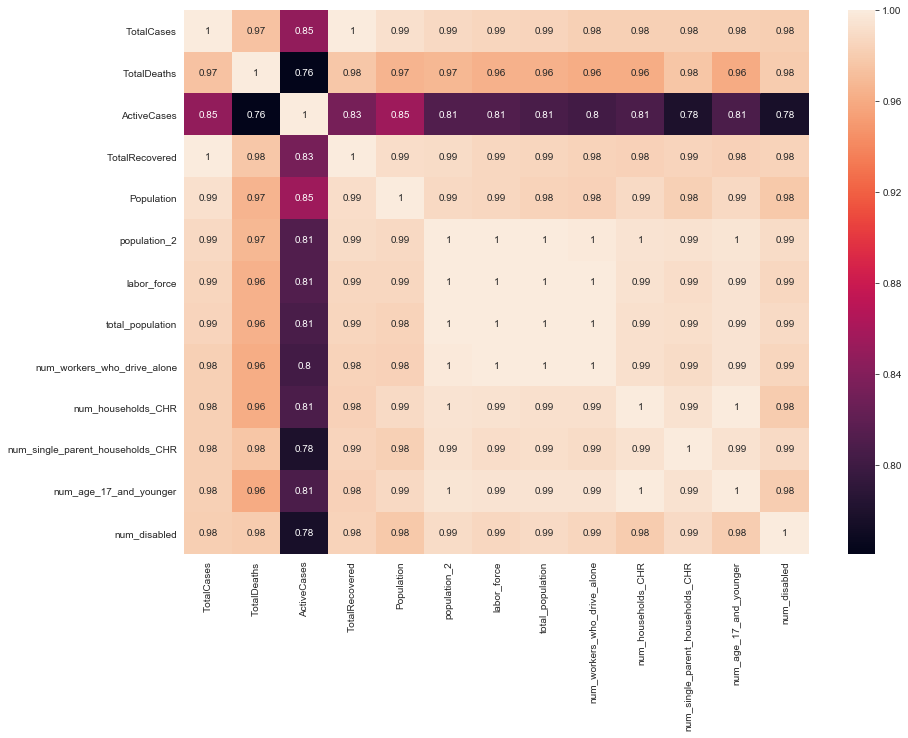

In [122]:
sns.heatmap(final_df_total.corr(),annot = True)

### Train Test Split


#### I Removed New York since it was an outlier and seemed to affect results after training and running model

In [123]:
cordemo_train,cordemo_test = shuffled_split_dfs(final_df_total[final_df_total['State'] != 'New York'],test_size = 0.3)

In [124]:
cordemo_train.head()

,State,TotalCases,TotalDeaths,ActiveCases,TotalRecovered,Population,population_2,labor_force,total_population,num_workers_who_drive_alone,num_households_CHR,num_single_parent_households_CHR,num_age_17_and_younger,num_disabled
0,Arkansas,856307,11550,8574,0.077894,0.062646,0.062497,0.055573,0.062657,0.056058,0.065293,0.078073,0.065652,0.106323
1,Hawaii,297851,1474,27181,0.015471,0.021501,0.021621,0.020366,0.021818,0.023446,0.021016,0.018988,0.021442,0.020321
2,California,9958460,92254,654536,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Missouri,1473752,20643,44103,0.140959,0.142774,0.171971,0.176521,0.173089,0.177799,0.170843,0.186934,0.171899,0.234528
4,Colorado,1504908,13349,85281,0.140659,0.133047,0.131296,0.146886,0.125456,0.143889,0.127424,0.109230,0.125365,0.120799


In [125]:
cordemo_test.head()

,State,TotalCases,TotalDeaths,ActiveCases,TotalRecovered,Population,population_2,labor_force,total_population,num_workers_who_drive_alone,num_households_CHR,num_single_parent_households_CHR,num_age_17_and_younger,num_disabled
34,Pennsylvania,2972356,45552,44130,0.303204,0.313952,0.313739,0.321051,0.320477,0.326096,0.284639,0.309942,0.286915,0.416305
35,Kansas,797782,8943,15744,0.070948,0.059963,0.059872,0.062414,0.060814,0.064473,0.066652,0.060246,0.067216,0.071178
36,Wyoming,162160,1824,3688,0.003080,0.000000,0.000000,0.000000,0.000000,0.000000,0.002188,0.000113,0.002677,0.000000
37,Nevada,758379,10967,37922,0.063945,0.064248,0.063025,0.063364,0.059261,0.060440,0.061980,0.076717,0.060932,0.073577
38,District of Columbia,457907,4954,8642,0.034750,0.031035,0.003200,0.006020,0.001996,0.004484,0.000457,0.009880,0.000000,0.000273


In [126]:
coeffs_tot_cases = stoch_grad_desc(cordemo_train,output_col = 'TotalCases',cols_to_ignore=['State','TotalDeaths','ActiveCases'],alpha= 0.02, epoch = 1000)

Program took 0.0 hr(s), 0.0 min(s), 13.579725980758667 sec(s) to run


In [127]:
pred_df_cases = make_predictions(cordemo_test,coeffs_tot_cases,'TotalCases',['State','TotalDeaths','ActiveCases'])

In [128]:
pred_df_cases[['State','TotalCases','Prediction']].sort_values('TotalCases',ascending = False)

,State,TotalCases,Prediction
43,Texas,7078920,7.531099e+06
34,Pennsylvania,2972356,3.383771e+06
46,Ohio,2815069,3.162185e+06
42,Georgia,2608172,2.811698e+06
47,Arizona,2093680,1.999485e+06
39,Massachusetts,1910108,1.866100e+06
40,Indiana,1758650,1.807423e+06
41,Alabama,1340110,1.400986e+06
48,Louisiana,1290291,1.356350e+06
45,Maryland,1118785,1.409007e+06


In [129]:
check_accuracy(pred_df_cases)

{'MAE': 155660.43478273848,
 'ME': -98402.39978039701,
 'MSE': 44972235291.55392,
 'RMSE': 212066.5822154776,
 'r_sqd': 0.9833320689006174}

In [130]:
cordemo_test.describe()['TotalCases']

count    1.500000e+01
mean     1.837502e+06
std      1.700251e+06
min      1.621600e+05
25%      7.780805e+05
50%      1.340110e+06
75%      2.350926e+06
max      7.078920e+06
Name: TotalCases, dtype: float64

In [131]:
adj_r_sqd_cases = 1 - ((1 - .9785) * (16 - 1) / (16 - 10 - 1))

In [132]:
print("Adjusted R^2 for total cases is : %s" % adj_r_sqd_cases)

Adjusted R^2 for total cases is : 0.9355000000000001


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

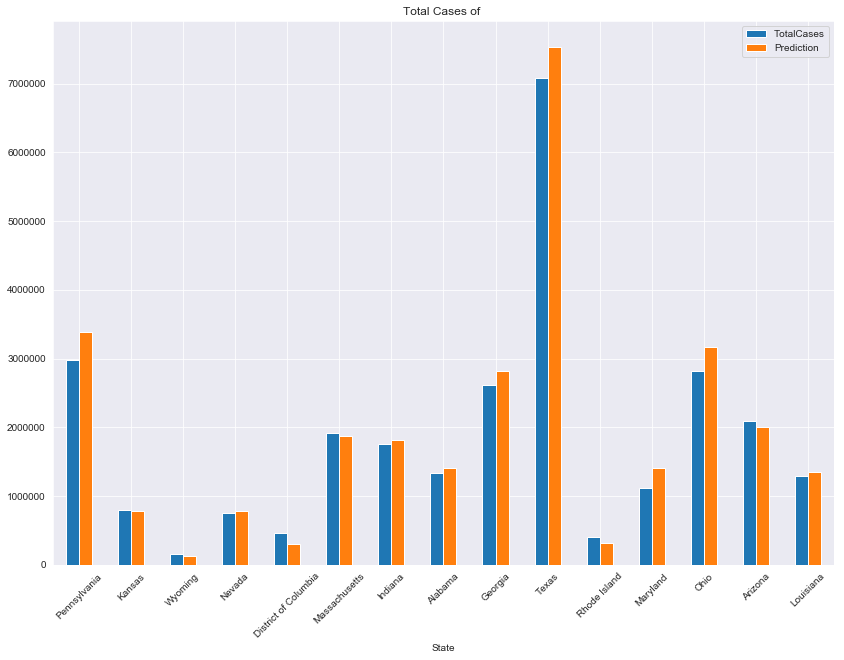

In [133]:
pred_df_cases.plot(kind = 'bar',x = 'State',y = ['TotalCases','Prediction'])
plt.title('Total Cases of ')
plt.xticks(rotation = 45)

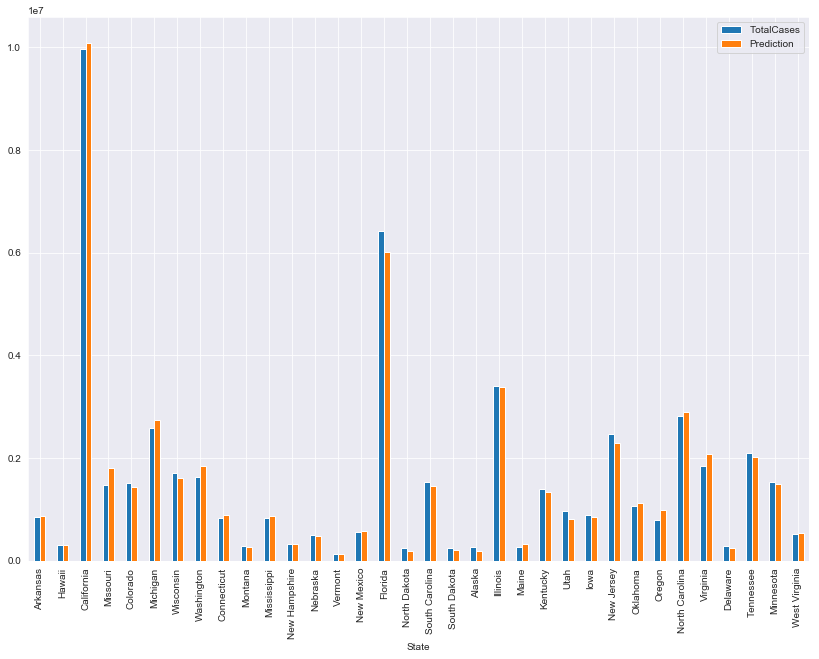

In [134]:
make_predictions(cordemo_train,coeff_list = coeffs_tot_cases,output_col = 'TotalCases',cols_to_ignore=['State','TotalDeaths','ActiveCases']).plot(kind = 'bar',x = 'State',y = ['TotalCases','Prediction'])

# Testing on Unlabeled Data

In [177]:
#make_predictions(cordemo_test.drop('TotalCases',axis = 1).merge(pd.DataFrame(np.matrix([list(cordemo_test['State'].values)] + [list(np.zeros(16))]).transpose(),columns=['State','TotalCases'])),output_col = 'TotalCases',coeff_list=coeffs_tot_cases,cols_to_ignore=['State','TotalDeaths','ActiveCases'])[['State','TotalCases','Prediction']].sort_values('Prediction',ascending = False)

### Running Linear Model for Total Deaths

In [135]:
coeffs_total_deaths = stoch_grad_desc(cordemo_train,output_col = 'TotalDeaths',cols_to_ignore = ['State','TotalCases','ActiveCases'],alpha = 0.011,epoch = 2000)

Program took 0.0 hr(s), 0.0 min(s), 31.94323205947876 sec(s) to run


In [136]:
coeffs_total_deaths

[1790.7442916369355,
 49908.54715391046,
 5520.595278307307,
 5480.862025300464,
 -183.81046578759313,
 4215.084797403956,
 -1848.9780377874363,
 -18077.484131278543,
 20298.221278229546,
 -18748.87354436272,
 49952.17863671686]

In [137]:
pred_df_deaths = make_predictions(dataset = cordemo_test,coeff_list = coeffs_total_deaths,output_col = 'TotalDeaths',cols_to_ignore=['State','TotalCases','ActiveCases'])

In [138]:
pred_df_deaths[['State','TotalDeaths','Prediction']].sort_values('TotalDeaths',ascending = False)

,State,TotalDeaths,Prediction
43,Texas,89006,74012.278130
34,Pennsylvania,45552,37626.548964
46,Ohio,38657,35048.868024
42,Georgia,38360,29511.870253
47,Arizona,30400,21803.096443
40,Indiana,23829,19829.064469
39,Massachusetts,20835,19930.155422
41,Alabama,19697,17188.326857
48,Louisiana,17380,16154.665608
45,Maryland,14729,13658.381784


In [139]:
check_accuracy(df = pred_df_deaths)

{'MAE': 3861.5020849478215,
 'ME': 3794.327766335527,
 'MSE': 32329750.461161163,
 'RMSE': 5685.925734756053,
 'r_sqd': 0.9304510723997342}

In [140]:
adj_r_sqd_deaths = 1 - ((1 - .94705) * (16 - 1) / (16 - 10 - 1))

In [141]:
print("Adjusted R^2 for total deaths is : %s" % adj_r_sqd_deaths)

Adjusted R^2 for total deaths is : 0.8411499999999998


In [142]:
cordemo_test.describe()['TotalDeaths']

count       15.000000
mean     24582.266667
std      22317.090214
min       1824.000000
25%       9955.000000
50%      19697.000000
75%      34380.000000
max      89006.000000
Name: TotalDeaths, dtype: float64

In [143]:
cordemo_test[['State','TotalDeaths']].sort_values('TotalDeaths',ascending = False)

,State,TotalDeaths
43,Texas,89006
34,Pennsylvania,45552
46,Ohio,38657
42,Georgia,38360
47,Arizona,30400
40,Indiana,23829
39,Massachusetts,20835
41,Alabama,19697
48,Louisiana,17380
45,Maryland,14729


# Linear Regression for Per Capita Cases and Per Capita Deaths

## Feature Selection for Per Capita Cases

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [144]:
features_percap_cases = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','TotalCases','ActiveCases','Deaths Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['Tot Cases Per 1M Pop']).sort_values(ascending = False).index[1:11])

In [145]:
features_percap_cases

['percent_long_commute_drives_alone',
 'percent_physically_inactive',
 'percent_american_indian_alaska_native',
 'percent_fair_or_poor_health',
 'percent_smokers',
 'percent_asian',
 'twentieth_percentile_income',
 'other_primary_care_provider_rate',
 'median_household_income',
 'area_sqmi']

In [146]:
final_df_percap_cases = cordemo_norm[['State','Tot Cases Per 1M Pop','Deaths Per 1M Pop'] + features_percap_cases]

In [147]:
final_df_percap_cases

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,percent_long_commute_drives_alone,percent_physically_inactive,percent_american_indian_alaska_native,percent_fair_or_poor_health,percent_smokers,percent_asian,twentieth_percentile_income,other_primary_care_provider_rate,median_household_income,area_sqmi
0,California,252035,2335,0.760410,0.134253,0.092456,0.397486,0.152716,0.392001,0.574145,0.030443,0.803908,0.272937
1,Texas,244135,3070,0.659928,0.540914,0.050741,0.740294,0.391011,0.114889,0.404719,0.193404,0.402844,0.457762
2,Florida,299229,3506,0.760694,0.636335,0.016619,0.670623,0.583874,0.057538,0.253239,0.431721,0.263484,0.093901
3,New York,294460,3596,1.000000,0.559977,0.051941,0.461314,0.355498,0.274595,0.362794,0.524545,0.660958,0.083013
4,Illinois,267800,3032,0.789560,0.413471,0.022650,0.391724,0.398734,0.135873,0.446132,0.194741,0.549695,0.097193
5,Pennsylvania,232179,3558,0.661990,0.460632,0.008901,0.391346,0.613168,0.076773,0.393189,0.484775,0.431634,0.078309
6,North Carolina,269256,2397,0.521918,0.537010,0.090345,0.497408,0.536716,0.061656,0.261201,0.547440,0.263577,0.085102
7,Ohio,240829,3307,0.459667,0.662533,0.002456,0.500416,0.745625,0.042871,0.277247,0.335106,0.303125,0.071509
8,Georgia,245650,3613,0.750708,0.734956,0.018009,0.555669,0.552083,0.092301,0.336186,0.397062,0.382093,0.100834
9,Michigan,258479,3672,0.530030,0.481868,0.032430,0.332129,0.604659,0.068062,0.303957,0.388449,0.329755,0.098997


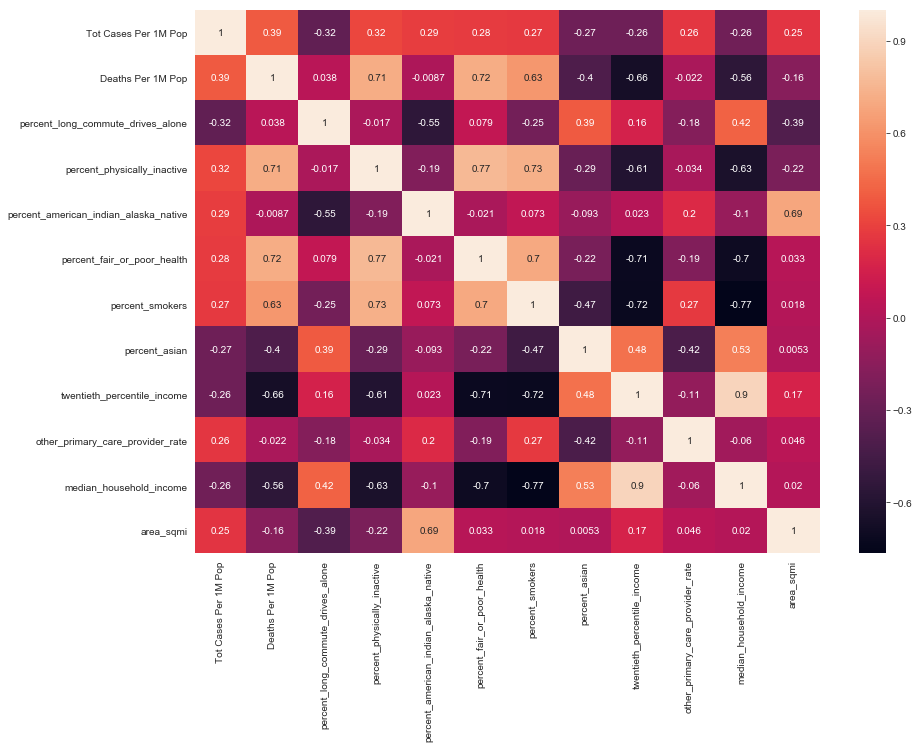

In [148]:
sns.heatmap(final_df_percap_cases.corr(),annot = True)

### Train Test Split


In [149]:
cordemo_train_percap_cases,cordemo_test_percap_cases = shuffled_split_dfs(final_df_percap_cases,test_size = 0.3)

In [150]:
cordemo_train.head()

,State,TotalCases,TotalDeaths,ActiveCases,TotalRecovered,Population,population_2,labor_force,total_population,num_workers_who_drive_alone,num_households_CHR,num_single_parent_households_CHR,num_age_17_and_younger,num_disabled
0,Arkansas,856307,11550,8574,0.077894,0.062646,0.062497,0.055573,0.062657,0.056058,0.065293,0.078073,0.065652,0.106323
1,Hawaii,297851,1474,27181,0.015471,0.021501,0.021621,0.020366,0.021818,0.023446,0.021016,0.018988,0.021442,0.020321
2,California,9958460,92254,654536,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Missouri,1473752,20643,44103,0.140959,0.142774,0.171971,0.176521,0.173089,0.177799,0.170843,0.186934,0.171899,0.234528
4,Colorado,1504908,13349,85281,0.140659,0.133047,0.131296,0.146886,0.125456,0.143889,0.127424,0.109230,0.125365,0.120799


In [151]:
cordemo_test.head()

,State,TotalCases,TotalDeaths,ActiveCases,TotalRecovered,Population,population_2,labor_force,total_population,num_workers_who_drive_alone,num_households_CHR,num_single_parent_households_CHR,num_age_17_and_younger,num_disabled
34,Pennsylvania,2972356,45552,44130,0.303204,0.313952,0.313739,0.321051,0.320477,0.326096,0.284639,0.309942,0.286915,0.416305
35,Kansas,797782,8943,15744,0.070948,0.059963,0.059872,0.062414,0.060814,0.064473,0.066652,0.060246,0.067216,0.071178
36,Wyoming,162160,1824,3688,0.003080,0.000000,0.000000,0.000000,0.000000,0.000000,0.002188,0.000113,0.002677,0.000000
37,Nevada,758379,10967,37922,0.063945,0.064248,0.063025,0.063364,0.059261,0.060440,0.061980,0.076717,0.060932,0.073577
38,District of Columbia,457907,4954,8642,0.034750,0.031035,0.003200,0.006020,0.001996,0.004484,0.000457,0.009880,0.000000,0.000273


### Running Linear Model for Per Capita Cases

In [152]:
coeffs_percap_cases = stoch_grad_desc(cordemo_train_percap_cases,output_col = 'Tot Cases Per 1M Pop',cols_to_ignore = ['State','Deaths Per 1M Pop'],alpha = 0.001,epoch = 2000)

Program took 0.0 hr(s), 0.0 min(s), 33.76407313346863 sec(s) to run


In [153]:
coeffs_percap_cases

[206034.28620671786,
 -43436.144569398435,
 46952.1318899121,
 22530.154192118567,
 38747.91699672501,
 -10059.258695089893,
 8473.25184478759,
 82.5540784644637,
 66899.37122122922,
 40136.120902806346,
 13326.34474605606]

In [154]:
pred_df_percap_cases = make_predictions(dataset = cordemo_test_percap_cases,coeff_list = coeffs_percap_cases,output_col='Tot Cases Per 1M Pop',cols_to_ignore = ['State','Deaths Per 1M Pop'])

In [155]:
check_accuracy(df = pred_df_percap_cases)

{'MAE': 25501.39540232886,
 'ME': -12364.916050547252,
 'MSE': 896750269.1261961,
 'RMSE': 29945.7888546319,
 'r_sqd': 0.45104427514412126}

In [156]:
pred_df_percap_cases[['State','Tot Cases Per 1M Pop','Prediction']].sort_values('Tot Cases Per 1M Pop',ascending = False)

,State,Tot Cases Per 1M Pop,Prediction
43,Alaska,351671,342358.835542
37,Arizona,287644,259515.719774
39,Iowa,282776,265508.576672
40,South Dakota,273889,298241.346505
48,Alabama,273314,271791.589681
38,Minnesota,272863,257965.615818
42,North Carolina,269256,273368.464182
41,Illinois,267800,240404.067375
36,Nebraska,256079,281945.082944
46,New Hampshire,242908,265570.393398


In [157]:
adj_r_sqd_percap_cases = 1 - ((1 - .504) * (16 - 1) / (16 - 10 - 1))

In [158]:
print("Adjusted R^2 for per capita cases is : %s" % adj_r_sqd_percap_cases)

Adjusted R^2 for per capita cases is : -0.488


In [159]:
cordemo_test_percap_cases.describe()['Tot Cases Per 1M Pop']

count        15.000000
mean     254732.800000
std       41835.860892
min      188621.000000
25%      222325.000000
50%      267800.000000
75%      273601.500000
max      351671.000000
Name: Tot Cases Per 1M Pop, dtype: float64

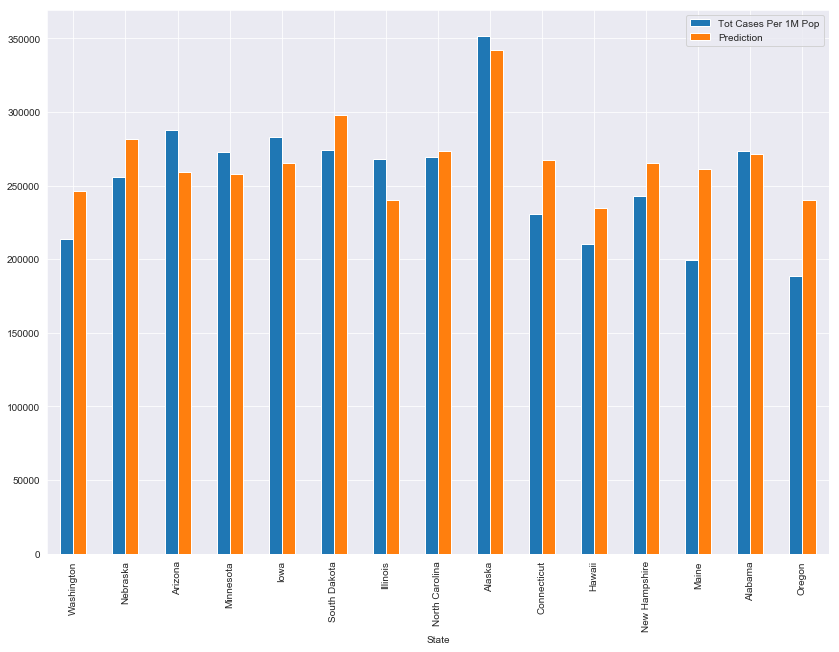

In [160]:
pred_df_percap_cases[['State','Tot Cases Per 1M Pop','Prediction']].plot(kind = 'bar',x = 'State',y = ['Tot Cases Per 1M Pop','Prediction'])

## Feature Selection for Per Capita Cases

### Now I am going to select 10 features since there should be at least 3 data points for every feature

In [161]:
features_percap_deaths = list(np.abs(cordemo_norm.drop(['State','TotalDeaths','TotalCases','ActiveCases','Tot Cases Per 1M Pop','TotalTests','Tests Per 1M Pop'],
                                                 axis = 1).corr()['Deaths Per 1M Pop']).sort_values(ascending = False).index[1:11])

In [162]:
features_percap_deaths

['percent_fair_or_poor_health',
 'percent_physically_inactive',
 'percent_children_in_poverty',
 'twentieth_percentile_income',
 'percentile_rank_socioeconomic_theme',
 'percentile_rank_below_poverty',
 'percent_below_poverty',
 'percentile_rank_no_highschool_diploma',
 'percent_smokers',
 'percent_frequent_physical_distress']

In [163]:
final_df_percap_deaths = cordemo_norm[['State','Tot Cases Per 1M Pop','Deaths Per 1M Pop'] + features_percap_deaths]

In [164]:
final_df_percap_deaths

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,percent_fair_or_poor_health,percent_physically_inactive,percent_children_in_poverty,twentieth_percentile_income,percentile_rank_socioeconomic_theme,percentile_rank_below_poverty,percent_below_poverty,percentile_rank_no_highschool_diploma,percent_smokers,percent_frequent_physical_distress
0,California,252035,2335,0.397486,0.134253,0.379178,0.574145,0.710025,0.619577,0.527485,1.000000,0.152716,0.303310
1,Texas,244135,3070,0.740294,0.540914,0.603710,0.404719,0.631291,0.667067,0.590559,0.934513,0.391011,0.431275
2,Florida,299229,3506,0.670623,0.636335,0.543504,0.253239,0.648015,0.650920,0.546114,0.586817,0.583874,0.623076
3,New York,294460,3596,0.461314,0.559977,0.487475,0.362794,0.616294,0.662107,0.603534,0.781817,0.355498,0.321568
4,Illinois,267800,3032,0.391724,0.413471,0.355130,0.446132,0.482551,0.478501,0.394536,0.487133,0.398734,0.228104
5,Pennsylvania,232179,3558,0.391346,0.460632,0.367650,0.393189,0.390000,0.376151,0.346038,0.344575,0.613168,0.408261
6,North Carolina,269256,2397,0.497408,0.537010,0.577328,0.261201,0.691782,0.696032,0.602140,0.637695,0.536716,0.535269
7,Ohio,240829,3307,0.500416,0.662533,0.517686,0.277247,0.497181,0.602380,0.495274,0.349727,0.745625,0.518315
8,Georgia,245650,3613,0.555669,0.734956,0.628014,0.336186,0.730932,0.739770,0.673444,0.669600,0.552083,0.330522
9,Michigan,258479,3672,0.332129,0.481868,0.501695,0.303957,0.570410,0.631307,0.558934,0.314223,0.604659,0.479093


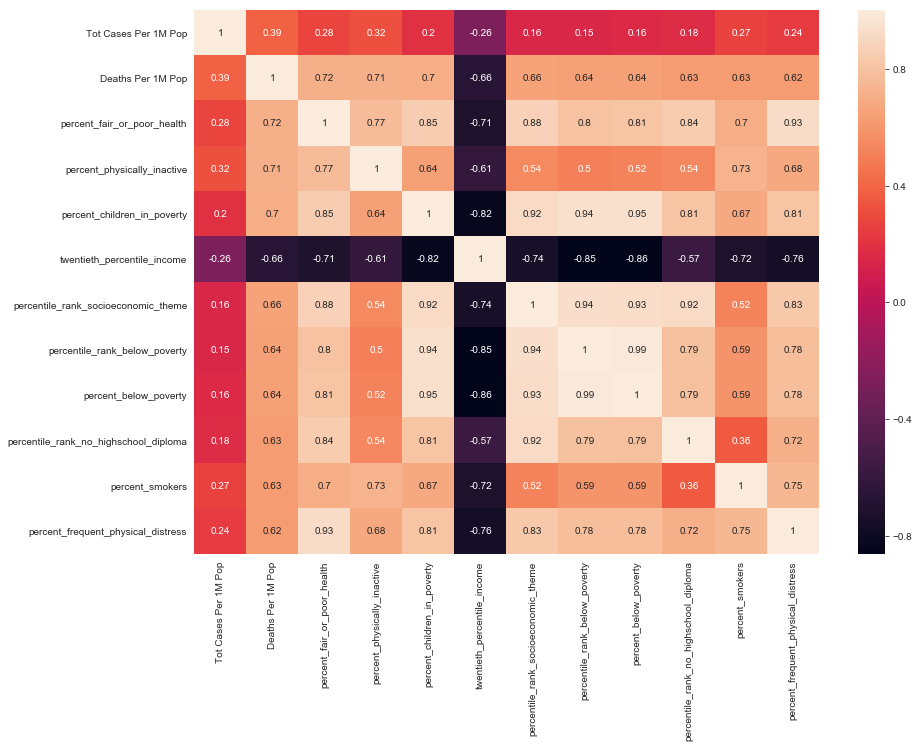

In [165]:
sns.heatmap(final_df_percap_deaths.corr(),annot = True)

### Train Test Split


In [166]:
cordemo_train_percap_deaths,cordemo_test_percap_deaths = shuffled_split_dfs(final_df_percap_deaths,test_size = 0.3)

In [167]:
cordemo_train_percap_deaths.head(2)

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,percent_fair_or_poor_health,percent_physically_inactive,percent_children_in_poverty,twentieth_percentile_income,percentile_rank_socioeconomic_theme,percentile_rank_below_poverty,percent_below_poverty,percentile_rank_no_highschool_diploma,percent_smokers,percent_frequent_physical_distress
0,Illinois,267800,3032,0.391724,0.413471,0.355130,0.446132,0.482551,0.478501,0.394536,0.487133,0.398734,0.228104
1,Colorado,261326,2318,0.134349,0.000000,0.127038,0.696988,0.248483,0.311325,0.264750,0.221401,0.349899,0.132567


In [168]:
cordemo_test_percap_deaths.head(2)

,State,Tot Cases Per 1M Pop,Deaths Per 1M Pop,percent_fair_or_poor_health,percent_physically_inactive,percent_children_in_poverty,twentieth_percentile_income,percentile_rank_socioeconomic_theme,percentile_rank_below_poverty,percent_below_poverty,percentile_rank_no_highschool_diploma,percent_smokers,percent_frequent_physical_distress
35,New Jersey,277032,3822,0.449119,0.642944,0.186782,0.721830,0.318561,0.218222,0.168062,0.406357,0.330024,0.281550
36,South Dakota,273889,3313,0.109026,0.357512,0.297633,0.376444,0.204084,0.365870,0.397128,0.157263,0.531937,0.185593


### Running Linear Model on Per Capita Deaths

In [169]:
coeffs_percap_deaths = stoch_grad_desc(cordemo_train_percap_deaths,output_col = 'Deaths Per 1M Pop',cols_to_ignore=['State','Tot Cases Per 1M Pop'],alpha= 0.002, epoch = 1000)

Program took 0.0 hr(s), 0.0 min(s), 14.58008885383606 sec(s) to run


In [170]:
pred_df_percap_deaths = make_predictions(cordemo_test_percap_deaths,coeffs_percap_deaths,output_col = 'Deaths Per 1M Pop',cols_to_ignore= ['State','Tot Cases Per 1M Pop'])

In [171]:
check_accuracy(pred_df_percap_deaths)

{'MAE': 588.7727244516472,
 'ME': -36.30727176543663,
 'MSE': 459514.5857906816,
 'RMSE': 677.8757893528,
 'r_sqd': 0.4838630944160701}

In [172]:
pred_df_percap_deaths[['State','Deaths Per 1M Pop','Prediction']].sort_values('Deaths Per 1M Pop',ascending = False)

,State,Deaths Per 1M Pop,Prediction
48,Arkansas,3827,4173.105433
35,New Jersey,3822,2877.864114
40,Michigan,3672,3075.924785
38,Pennsylvania,3558,2856.945609
45,Indiana,3540,3385.964795
42,South Carolina,3497,3572.294618
44,Missouri,3363,3165.888664
36,South Dakota,3313,2629.596809
39,Wyoming,3152,2624.782005
47,Iowa,3047,2706.542323


In [173]:
cordemo_test_percap_deaths.describe()['Deaths Per 1M Pop']

count      15.000000
mean     2870.266667
std       976.672153
min      1041.000000
25%      2317.500000
50%      3313.000000
75%      3549.000000
max      3827.000000
Name: Deaths Per 1M Pop, dtype: float64

In [174]:
adj_r_sqd_percap_deaths = 1 - ((1 - .418) * (16 - 1) / (16 - 10 - 1))

In [175]:
print("Adjusted R^2 for per capita deaths is : %s" % adj_r_sqd_percap_deaths)

Adjusted R^2 for per capita deaths is : -0.746


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

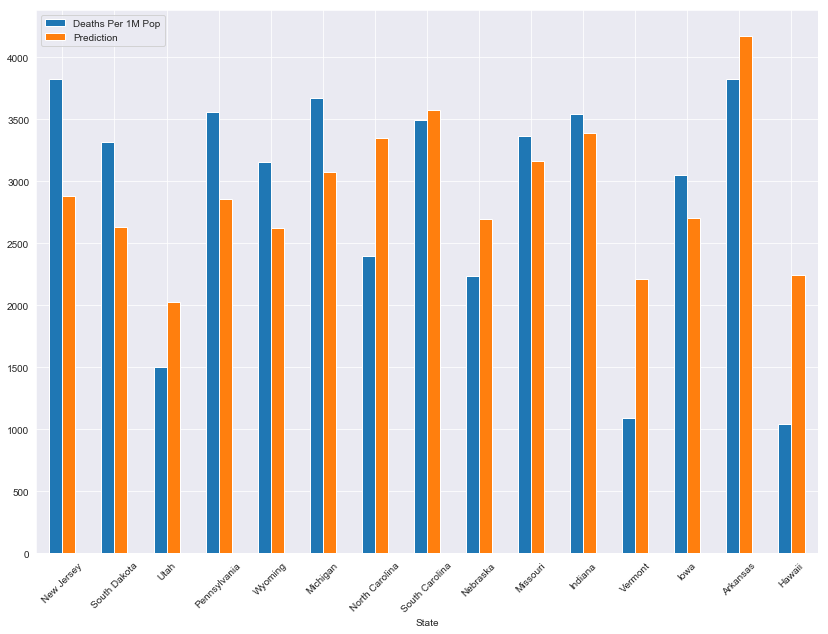

In [176]:
pred_df_percap_deaths.plot(kind = 'bar',x = 'State',y = ['Deaths Per 1M Pop','Prediction'])
plt.xticks(rotation = 45)